In [1]:
import os.path
import pandas as pd

In [2]:
cwd = os.getcwd()
data_path = os.path.join(cwd, "data-temp", "API_EG.ELC.COAL.ZS_DS2_en_csv_v2_251870.csv")
meta_path = os.path.join(cwd, "data-temp", "Metadata_Country_API_EG.ELC.COAL.ZS_DS2_en_csv_v2_251870.csv")

data_path, meta_path
# !ls data-temp/

('/home/sorin/myData/PROJ-flatiron/project-mod3/data-temp/API_EG.ELC.COAL.ZS_DS2_en_csv_v2_251870.csv',
 '/home/sorin/myData/PROJ-flatiron/project-mod3/data-temp/Metadata_Country_API_EG.ELC.COAL.ZS_DS2_en_csv_v2_251870.csv')

In [3]:
data_df = pd.read_csv(data_path, skiprows=4)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              31 non-null float64
1961              31 non-null float64
1962              31 non-null float64
1963              31 non-null float64
1964              31 non-null float64
1965              32 non-null float64
1966              32 non-null float64
1967              32 non-null float64
1968              32 non-null float64
1969              32 non-null float64
1970              32 non-null float64
1971              151 non-null float64
1972              151 non-null float64
1973              152 non-null float64
1974              152 non-null float64
1975              152 non-null float64
1976              152 non-null float64
1977              152 non-null float64
1978              152 non-null float64
1979         

In [4]:
columns_to_drop = set(data_df.columns).difference({"Country Code", "Country Name",
                                                   "1990", "1995", "2000", "2005", "2010", "2011",
                                                   "2012", "2013", "2014", "2015"})
data_df.drop(columns=list(columns_to_drop), inplace=True)
data_df.dropna(thresh=5, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 2 to 263
Data columns (total 12 columns):
Country Name    185 non-null object
Country Code    185 non-null object
1990            177 non-null float64
1995            180 non-null float64
2000            183 non-null float64
2005            184 non-null float64
2010            184 non-null float64
2011            184 non-null float64
2012            185 non-null float64
2013            185 non-null float64
2014            185 non-null float64
2015            185 non-null float64
dtypes: float64(10), object(2)
memory usage: 18.8+ KB


In [5]:
meta_df = pd.read_csv(meta_path)
meta_df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [6]:
df = pd.merge(data_df, meta_df[["Country Code", "Region", "IncomeGroup"]], how="left")
df

,Country Name,Country Code,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,Region,IncomeGroup
0,Angola,AGO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sub-Saharan Africa,Lower middle income
1,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Europe & Central Asia,Upper middle income
2,Arab World,ARB,0.878220,1.767422,1.923165,2.037403,1.235533,1.286167,1.235651,1.209756,1.484657,1.519196,NaN,NaN
3,United Arab Emirates,ARE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Middle East & North Africa,High income
4,Argentina,ARG,1.300749,2.847124,2.003149,2.066527,2.405339,2.835861,2.920510,2.548929,2.217284,2.029567,Latin America & Caribbean,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Kosovo,XKX,NaN,NaN,97.598918,96.882010,96.536378,97.827961,98.149083,97.578544,96.946284,97.466906,Europe & Central Asia,Upper middle income
181,"Yemen, Rep.",YEM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Middle East & North Africa,Low income
182,South Africa,ZAF,94.280618,93.407631,93.062833,94.637169,94.260622,93.804127,94.631502,93.743878,93.101803,92.711238,Sub-Saharan Africa,Upper middle income
183,Zambia,ZMB,0.486709,0.151439,0.179533,0.179051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sub-Saharan Africa,Lower middle income


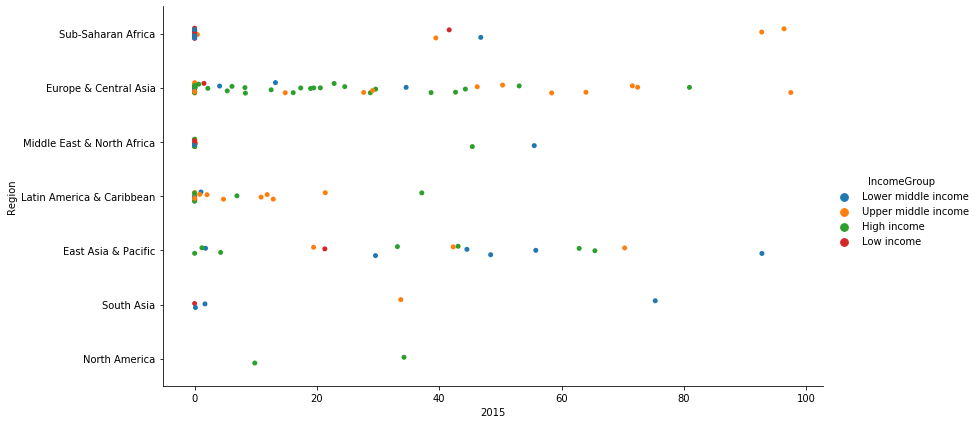

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.catplot(data=df, y="Region", x="2015", hue="IncomeGroup", height=6, aspect=2);